### Data Exploration

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

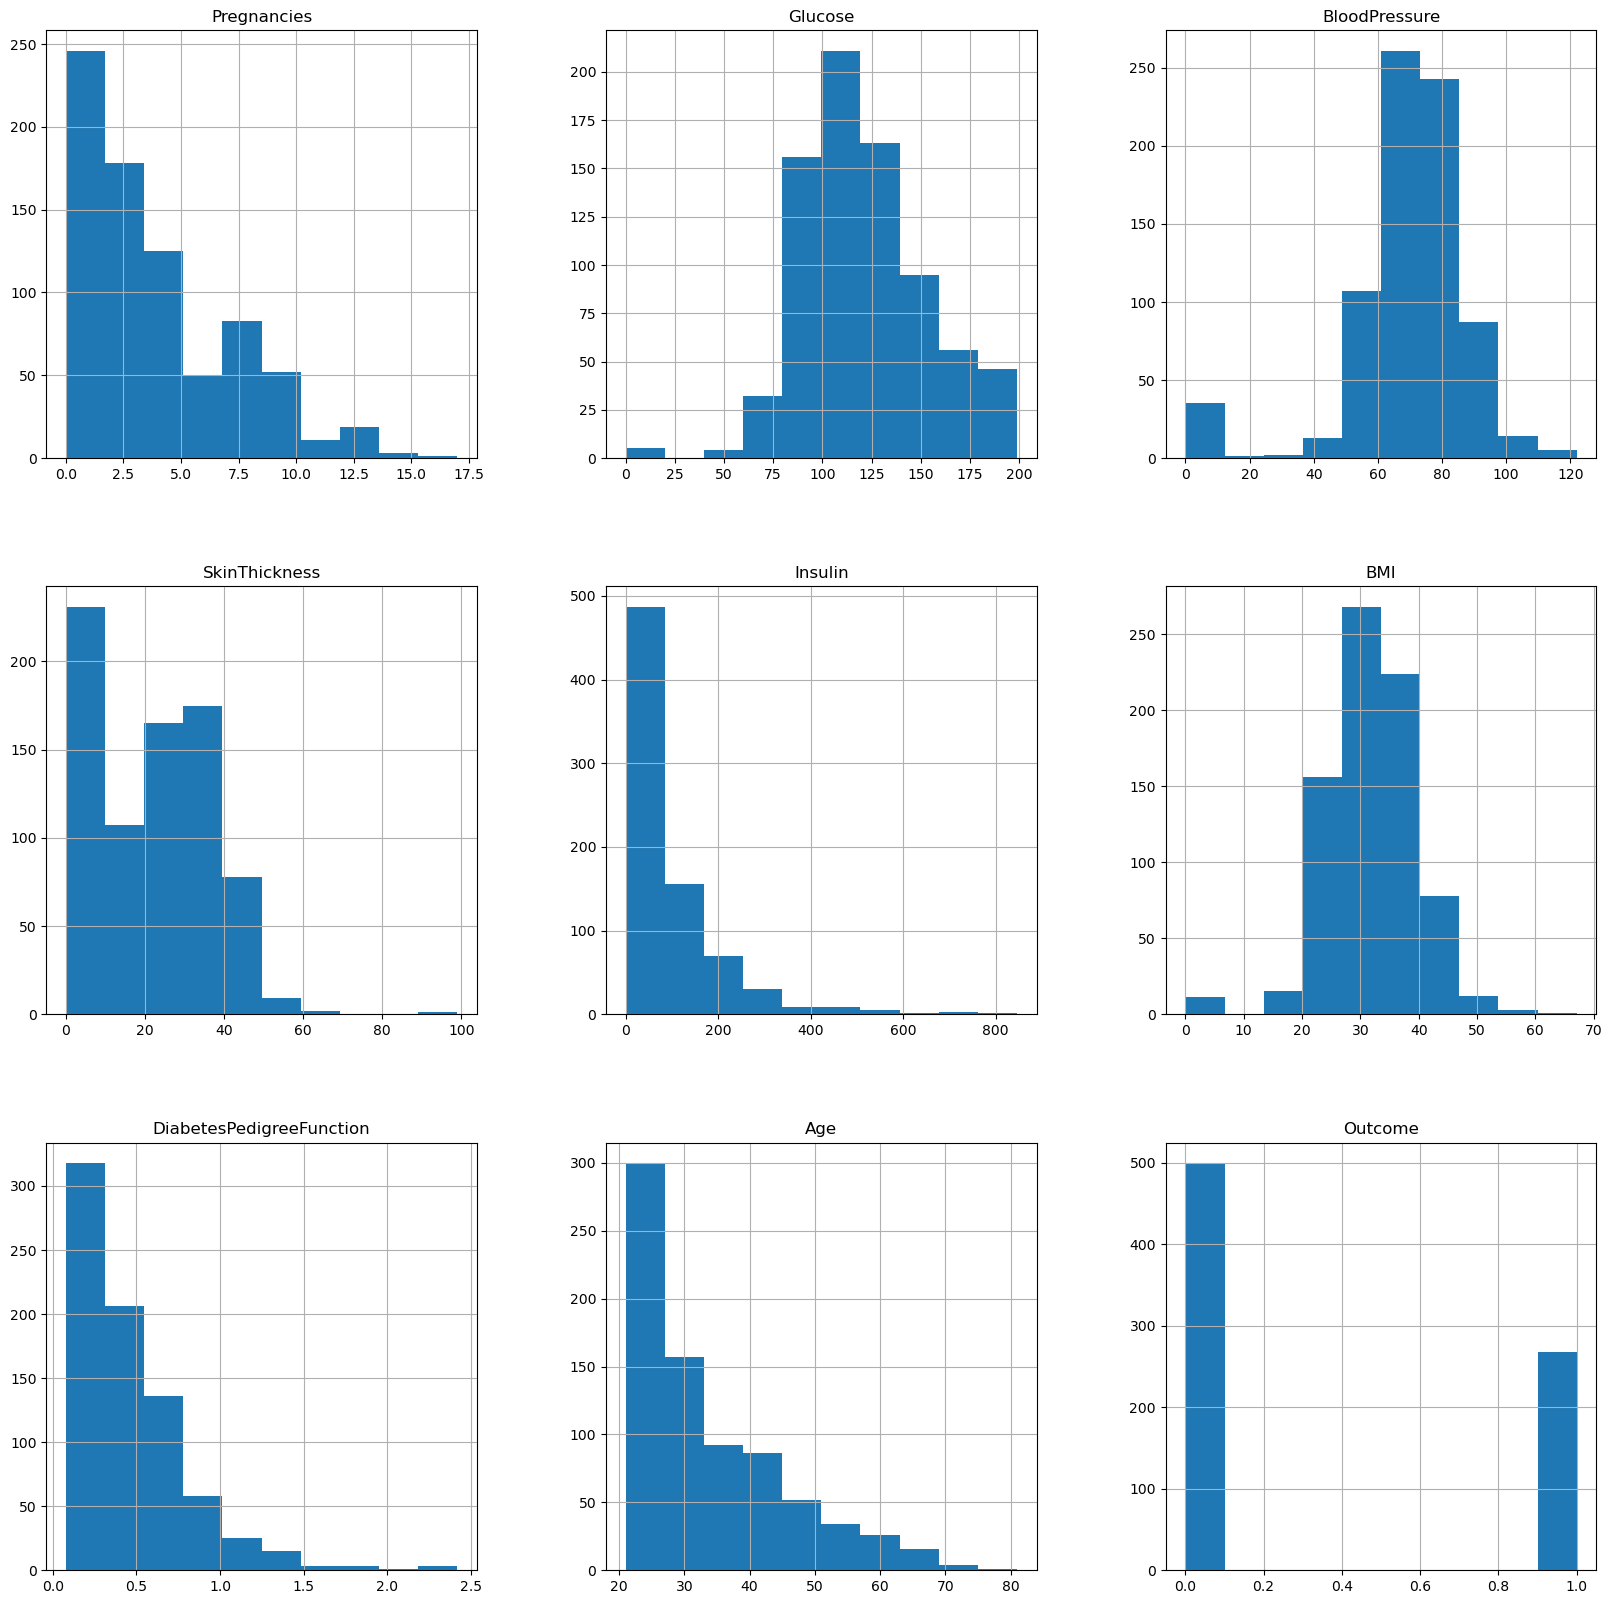

In [1]:
import pandas as pd
diabetes_data = pd.read_csv('diabetes.csv')
p = diabetes_data.hist(figsize = (20,20))
diabetes_data.columns

0    500
1    268
Name: Outcome, dtype: int64


Text(0, 0.5, 'Case counts')

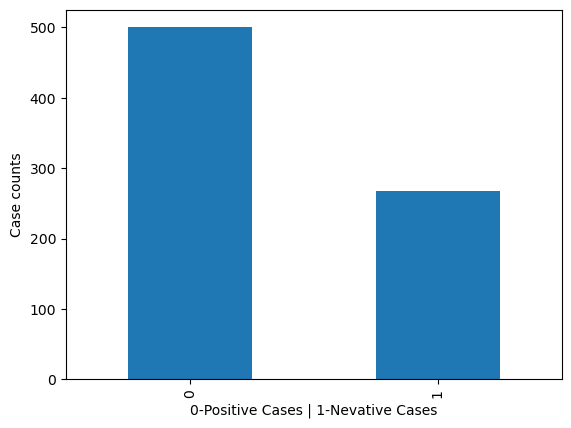

In [2]:

## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar",)
p.set_xlabel("0-Positive Cases | 1-Nevative Cases")
p.set_ylabel("Case counts")

In [3]:
from sklearn.datasets import load_svmlight_file
diabetes_features,diabetes_labels = load_svmlight_file('diabetes_scale.txt')
#Since the data is of the type SVMlight file using a tht particular reader to read the data
print(diabetes_features.shape)

(768, 8)


In [4]:
#the data in of the form of a tuple 
diabetes_features = diabetes_features.toarray()
print(type(diabetes_features),type(diabetes_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
import numpy as np
import random
np.random.seed(10)
weights = np.random.rand(8)
# weights = np.array([0.,0.,0.,0.,0.,0.,0.,0.])
weights

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071])

In [6]:
def accuracy(y_true, y_pred):
    accuracy = np.mean(y_pred == y_true)
    return accuracy
#Prredicting for each row {-1,1} and then getting tht into pred array and returning the accuracy
def predict(features,weight):
    pred = list()
    for row in features:
        activation = 0
        for i in range(len(row)):
            activation += weights[i ] * row[i] #calc Xi*Wi
        pred.append(np.sign(activation))# Predictig for 1 row
    return (accuracy(diabetes_labels, pred))
def update_weights(weights):
    l_rate = 0.0001
    summation = 0
    for row,y in zip(diabetes_features,diabetes_labels):
        # calaculating the summation of 1*8 vector for each row
        summation+= (y*row*(1 if y*(np.dot(row,weights))<0 else 0))
    #now modifying the weights according to learning for 
    weights += (l_rate*summation)
#     print("updated",weights)
    return weights

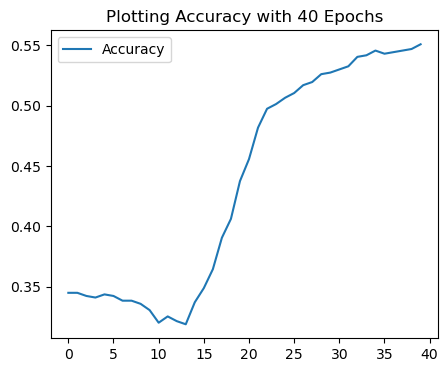

best accuracy:  0.55078125
best weights:  [ 0.10378526 -0.10073597  0.51230559  0.24198056 -0.09956228  0.03309548
 -0.2585228   0.05204732]


In [7]:
# print("1st accuracy" ,predict(diabetes_features,weights))
import matplotlib.pyplot as plt
best_weights = 0
best_accu = 0
acc_list,loss_list = [],[]
for i in range(40):
    acc = predict(diabetes_features,weights)
    weights = update_weights(weights)
    acc_list.append(acc)
    if acc>best_accu:
        best_accu = acc
        best_weights = weights
#     l = zero_one_loss(diabetes_features,diabetes_labels,weights)
#     loss_list.append(l)
# plt.figure(figsize=(5, 4))
# plt.title("Plotting Loss with 20 Epochs ")
# plt.plot(np.arange(20), e_train_loss_list, label = " Loss")
# plt.legend()
# plt.show()

#Plotting Validation Curve
plt.figure(figsize=(5, 4))
plt.title("Plotting Accuracy with 40 Epochs")
plt.plot(np.arange(40), acc_list, label = "Accuracy")
# plt.plot(np.arange(40), loss_list, label = "Loss")
plt.legend()
plt.show()
    
print("best accuracy: ",best_accu)
print("best weights: " ,best_weights)

## Experimentation

In [8]:
#Adding an additional column to the dataset initialized as all 1 & and additional weight which acts as bias
import numpy as np
type(diabetes_features)
bias_col = np.ones(len(diabetes_features)).reshape(-1,1)
mod_diabetes_features = np.concatenate([diabetes_features, bias_col], axis=1)
print(mod_diabetes_features.shape)

(768, 9)


In [9]:
from sklearn.model_selection import train_test_split
#Splits With Bias
X_bigtrain, b_X_test, y_bigtrain, b_y_test = train_test_split(mod_diabetes_features, diabetes_labels, test_size=0.20, random_state=42,stratify=diabetes_labels,shuffle=True)
b_X_train, b_X_Val, b_y_train, b_y_Val = train_test_split(X_bigtrain, y_bigtrain, test_size=0.20, random_state=42,stratify=y_bigtrain,shuffle=True)
print("Splits With Bias")
print("Training Size :",b_X_train.shape)
print("Testing Size :",b_X_test.shape)
print("Validation Size :",b_X_Val.shape)

#splitting with no bias 
X_bigtrain, X_test, y_bigtrain, y_test = train_test_split(diabetes_features, diabetes_labels, test_size=0.20, random_state=42,stratify=diabetes_labels,shuffle=True)
X_train, X_Val, y_train, y_Val = train_test_split(X_bigtrain, y_bigtrain, test_size=0.20, random_state=42,stratify=y_bigtrain,shuffle=True)
print("Splits With Bias")
print("Training Size :",X_train.shape)
print("Testing Size :",X_test.shape)
print("Validation Size :",X_Val.shape)

Splits With Bias
Training Size : (491, 9)
Testing Size : (154, 9)
Validation Size : (123, 9)
Splits With Bias
Training Size : (491, 8)
Testing Size : (154, 8)
Validation Size : (123, 8)


In [10]:
import seaborn as sns
def accuracy(y_true, y_pred):
    accuracy = np.mean(y_pred == y_true)
    return accuracy
#Prredicting for each row {-1,1} and then getting tht into pred array and returning the accuracy
def predict(features,labels,weights):
    pred = list()
    for row in features:
        activation = 0
        for i in range(len(row)):
            activation += weights[i] * row[i] #calc Xi*Wi
        pred.append(np.sign(activation))# Predictig for 1 row
    return (accuracy(labels, pred))
def accuracy_scores(features,labels,weights):
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
    from sklearn.metrics import roc_curve,roc_auc_score
    pred = list()
    for row in features:
        activation = 0
        for i in range(len(row)):
            activation += weights[i] * row[i] #calc Xi*Wi
        pred.append(np.sign(activation))# Predictig for 1 row
    print("F1 Score :",f1_score(labels, pred, average="binary"))
    print("Precision :",precision_score(labels, pred, average="binary"))
    print("Recall :",recall_score(labels, pred, average="binary"))
    print("Confusion Matrix :")
    cmat = confusion_matrix(labels, pred)
    sns.heatmap(cmat,annot=True)
    ax= plt.subplot()
    sns.heatmap(cmat, annot=True, fmt='g', ax=ax);
    # labels, title and ticks
    plt.title('Confusion Matrix')
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);
    
#     plt.set_xticklabels(['Positive', 'Negative'])
#     plt.set_yticklabels(['Positive', 'Negative'])
    plt.show()
    return 
def update_weights(weights,festures,labels,loss,l_rate):
#     l_rate = 0.001
    summation = 0
    for row,y in zip(festures,labels):
        # calaculating the summation of 1*8 vector for each row
        if(loss == "perceptron"):
            ls = max(0,-1*y*(np.dot(row,weights))) #Perceptron Loss
            summation+= (y*row*ls)
        elif(loss == "zero_one"):
            ls = (1 if y*(np.dot(row,weights))<0 else 0) #ZeroOne Loss
            summation+= (y*row*ls)
    #now modifying the weights according to learning for 
    weights += (l_rate*summation)
#     print("updated",weights)
    return weights
def zero_one_loss(features,labels,weights):
    loss =0
    for row ,y in zip(features,labels):
        loss+=(1 if y*(np.dot(row,weights))<0 else 0)
    return loss/len(labels)

def perceptron_loss(features,labels,weights):
    loss =0
    for row ,y in zip(features,labels):
        loss+= max(0,-1*y*(np.dot(row,weights)))
    return loss/len(labels)

### SK learn baseline

In [11]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
clf = Perceptron(tol=1e-3, random_state=42)
clf.fit(X_bigtrain, y_bigtrain)
Perceptron()
sk_pred = clf.predict(X_test)
print("Testing Accuracy for Sklearn Baseline : ",clf.score(X_test, y_test))
print("F1 Score :",f1_score(y_test, sk_pred, average="binary"))
print("Precision :",precision_score(y_test, sk_pred, average="binary"))
print("Recall :",recall_score(y_test, sk_pred, average="binary"))

Testing Accuracy for Sklearn Baseline :  0.7987012987012987
F1 Score : 0.8472906403940887
Precision : 0.8349514563106796
Recall : 0.86


In [12]:
#Initializing 8 weights + 1 Bias
np.random.seed(89)
b_weights = np.random.rand(9)
# weights = np.zeros(8)
weights

array([ 0.10378526, -0.10073597,  0.51230559,  0.24198056, -0.09956228,
        0.03309548, -0.2585228 ,  0.05204732])

### Experimenting with initial weights with bias

In [13]:
#Experimenting with the the best Random seed for weights
all_acc=list()
overall_best_acc = 0
overall_best_weights = 0
l_rate =0.001
for j in range(202):
    np.random.seed(j)
    b_weights = np.random.rand(9)
    best_weights = 0
    best_accu = 0
    for i in range(20):
        b_weights = update_weights(b_weights,b_X_train,b_y_train,"zero_one",l_rate)
        train_acc = predict(b_X_train,b_y_train,b_weights)
        val_acc = predict(b_X_Val,b_y_Val,b_weights)
#         print("Iteration ",i)
#         print("Training accuracy:",train_acc," Validation accuracy:",val_acc)
        if val_acc>best_accu:
            best_accu = val_acc
            best_weights = b_weights
#     print("for Random Seed:",j)
#     print("best accuracy: ",best_accu)
    if best_accu>overall_best_acc:
            overall_best_acc = best_accu
            overall_best_weights = best_weights
    all_acc.append((best_accu,j))
#     print("best weights: " ,best_weights)
all_acc.sort(reverse=True)
all_acc[:6]

[(0.7886178861788617, 89),
 (0.7560975609756098, 111),
 (0.7479674796747967, 195),
 (0.7398373983739838, 10),
 (0.7317073170731707, 160),
 (0.7317073170731707, 107)]

###  Experimenting with initial weights without bias

In [14]:
#Experimenting with the the best Random seed for weights
all_acc=list()
overall_best_acc = 0
overall_best_weights = 0
l_rate =0.001
for j in range(202):
    np.random.seed(j)
    weights = np.random.rand(8)
    best_weights = 0
    best_accu = 0
    for i in range(20):
        b_weights = update_weights(weights,X_train,y_train,"zero_one",l_rate)
        train_acc = predict(X_train,y_train,weights)
        val_acc = predict(X_Val,y_Val,weights)
#         print("Iteration ",i)
#         print("Training accuracy:",train_acc," Validation accuracy:",val_acc)
        if val_acc>best_accu:
            best_accu = val_acc
            best_weights = weights
#     print("for Random Seed:",j)
#     print("best accuracy: ",best_accu)
    if best_accu>overall_best_acc:
            overall_best_acc = best_accu
            overall_best_weights = best_weights
    all_acc.append((best_accu,j))
#     print("best weights: " ,best_weights)
all_acc.sort(reverse=True)
all_acc[:6]

[(0.7723577235772358, 84),
 (0.7723577235772358, 33),
 (0.7723577235772358, 26),
 (0.7642276422764228, 195),
 (0.7642276422764228, 140),
 (0.7642276422764228, 138)]

### Hyper-Parameter Tuning with Bias

In [15]:
import matplotlib.pyplot as plt
b_accuracy_table = list()
learning_Rates = [1,.1,.01,.001,0.0001]
epoch = np.arange(10,101,10)
loss =["perceptron","zero_one"]
for e in epoch:
    for lr_rate in learning_Rates:
        for l in loss:
            best_weights = 0
            best_epoch = 0
            best_accu = 0
            e_val_loss_list = []
            e_train_loss_list = []
            e_val_acc_list = []
            e_train_acc_list = []
            np.random.seed(89)
            b_weights = np.random.rand(9)
            for i in range(e):
                b_weights = update_weights(b_weights,b_X_train,b_y_train,l,lr_rate)
                train_acc = predict(b_X_train,b_y_train,b_weights)
                val_acc = predict(b_X_Val,b_y_Val,b_weights)
                e_val_acc_list.append(val_acc)
                e_train_acc_list.append(train_acc)
                if l =="zero_one":
                    e_train_loss = zero_one_loss(b_X_train,b_y_train,b_weights)
                    e_val_loss = zero_one_loss(b_X_Val,b_y_Val,b_weights)
                else:
                    e_train_loss = perceptron_loss(b_X_train,b_y_train,b_weights)
                    e_val_loss = perceptron_loss(b_X_Val,b_y_Val,b_weights)
                e_val_loss_list.append(e_val_loss)
                e_train_loss_list.append(e_train_loss)
            #     print("Iteration ",i)
            #     print("Training accuracy:",train_acc," Validation accuracy:",val_acc,"Validation Loss:",val_loss,"Training Loss ",train_loss)
                if val_acc>best_accu:
                    best_epoch = (i+1)
                    best_accu = val_acc
                    best_weights = b_weights

            b_accuracy_table.append((best_accu,lr_rate,l,best_epoch,e,best_weights))
            #Plotting Loss Curve
#             plt.figure(figsize=(5, 4))
#             if l =="zero_one":
#                 plt.title("Plotting Training vs Validation Loss with Zero_One_Loss with lr = "+ str(lr_rate))
#             else:
#                 plt.title("Plotting Training vs Validation Loss with Perceptron_Loss with lr = "+ str(lr_rate))
#             plt.plot(np.arange(e), e_val_loss_list, label = "Validation Loss")
#             plt.plot(np.arange(e), e_train_loss_list, label = "Training Loss")
#             plt.legend()
#             plt.show()

#             #Plotting Validation Curve
#             plt.figure(figsize=(5, 4))
#             if l =="zero_one":
#                 plt.title("Plotting Training vs Validation Accuracy with Zero_One_Loss with lr = "+ str(lr_rate))
#             else:
#                 plt.title("Plotting Training vs Validation Accuracy with Perceptron_Loss with lr = "+ str(lr_rate))

#             plt.plot(np.arange(e), e_val_acc_list, label = "Validation Accuracy")
#             plt.plot(np.arange(e), e_train_acc_list, label = "Training Accuracy")
#             plt.legend()
#             plt.show()
            print("best accuracy: ",best_accu)
            print("best weights: " ,best_weights)

best accuracy:  0.6504065040650406
best weights:  [ 6.70164952e+27 -6.12152058e+27 -2.14718836e+27  7.93712116e+27
  1.08634920e+28 -6.03405153e+26  8.93876291e+27  7.17940394e+27
 -1.39853446e+28]
best accuracy:  0.7560975609756098
best weights:  [-140.67680518 -259.66363439    0.99579383  -87.03447589  -92.95358699
 -124.57716338  -96.26415047 -133.48644587   32.09987276]
best accuracy:  0.6504065040650406
best weights:  [ 5.81768779e+17 -5.41560185e+17 -1.88110064e+17  6.91181572e+17
  9.46705553e+17 -5.60591783e+16  7.78559902e+17  6.23096284e+17
 -1.22070122e+18]
best accuracy:  0.7642276422764228
best weights:  [-13.81207308 -28.5777285   -0.64681919  -8.01116835  -7.59019274
 -13.9787949   -7.9269103  -13.30975536   1.59987276]
best accuracy:  0.6504065040650406
best weights:  [ 11992873.04793558 -14304357.83875002  -4393472.21047423
  14909062.39261475  20639435.64367222  -2297796.04239561
  16839969.04401296  12805259.86922669 -27205328.85905707]
best accuracy:  0.756097560975

best accuracy:  0.7886178861788617
best weights:  [-0.16436464 -0.44578637  0.14013341 -0.14118963  0.05522506 -0.25596373
 -0.1379086  -0.10318569  0.21087276]
best accuracy:  0.3902439024390244
best weights:  [ 0.22551605  0.18272732  0.22592016 -0.08673738  0.28687034 -0.04721567
 -0.04550781  0.1795434   0.3658048 ]
best accuracy:  0.4715447154471545
best weights:  [ 0.11155312 -0.02212615  0.13482683 -0.07222787  0.2710099  -0.10811959
 -0.02057633  0.06400435  0.29747276]
best accuracy:  0.6504065040650406
best weights:  [ 6.21287680e+170 -5.67505852e+170 -1.99058705e+170  7.35824154e+170
  1.00711828e+171 -5.59396886e+169  8.28683036e+170  6.65578706e+170
 -1.29653487e+171]
best accuracy:  0.7723577235772358
best weights:  [-139.61806118 -436.83947092  118.97944233  -79.15579029   37.06276441
 -232.48482287 -116.03531595  -56.08649477   10.09987276]
best accuracy:  0.6504065040650406
best weights:  [ 2.68029530e+110 -2.49504833e+110 -8.66651044e+109  3.18437631e+110
  4.36161330

best accuracy:  0.6504065040650406
best weights:  [ 6.13560827e+77 -7.31817439e+77 -2.24772032e+77  7.62754401e+77
  1.05592289e+78 -1.17556288e+77  8.61540459e+77  6.55122908e+77
 -1.39183698e+78]
best accuracy:  0.7886178861788617
best weights:  [-0.88854273 -4.2331069   1.21088829 -0.25661575  1.21621408 -2.31319122
 -0.638336    0.02591333 -0.26012724]
best accuracy:  0.6422764227642277
best weights:  [ 0.01520045 -0.11947962  0.0392801  -0.03086773  0.13476357 -0.08045295
  0.02956775  0.00022767  0.14418542]
best accuracy:  0.7886178861788617
best weights:  [-0.18030592 -0.44035416  0.14675642 -0.1386947   0.0194707  -0.25477895
 -0.15276684 -0.1019524   0.19787276]
best accuracy:  0.3983739837398374
best weights:  [ 0.17375345  0.09888533  0.17819215 -0.07495942  0.2746408  -0.06706486
 -0.02653161  0.12599731  0.32625098]
best accuracy:  0.6341463414634146
best weights:  [ 0.00951782 -0.14306784  0.04680551 -0.05363598  0.2075302  -0.10748918
  0.00837842  0.00607436  0.1908727

In [16]:
import pandas as pd
b_accuracy_table.sort(reverse=True)
dfb = pd.DataFrame(b_accuracy_table, columns=["Val_Accuracy", "Learning Rate","Loss","nth Epoch","Epoch Range","Best Weights"])
dfb.iloc[:45,:]

,Val_Accuracy,Learning Rate,Loss,nth Epoch,Epoch Range,Best Weights
0,0.788618,1.000,zero_one,84,100,"[-130.2063526795285, -439.9349045956876, 109.2..."
1,0.788618,1.000,zero_one,84,90,"[-202.20635517952866, -353.5630655156877, 137...."
2,0.788618,0.100,zero_one,76,100,"[-13.647380979530904, -43.89932696868829, 11.5..."
3,0.788618,0.100,zero_one,76,90,"[-9.370908279530937, -37.2556096126883, 11.187..."
4,0.788618,0.100,zero_one,76,80,"[-10.200318579530958, -37.69932956468831, 11.7..."
5,0.788618,0.010,zero_one,66,100,"[-0.8885427295311398, -4.233106898488324, 1.21..."
6,0.788618,0.010,zero_one,66,90,"[-0.9320719795311407, -4.303458752288324, 1.17..."
7,0.788618,0.010,zero_one,66,80,"[-1.1103071395311424, -4.371750336088324, 1.21..."
8,0.788618,0.010,zero_one,66,70,"[-1.9785424695311433, -3.987428883088325, 1.44..."
9,0.788618,0.001,zero_one,20,100,"[-0.18030591503116294, -0.4403541554783294, 0...."


Testing accuracy: 0.7727272727272727
F1 Score : 0.8275862068965517
Precision : 0.8155339805825242
Recall : 0.84
Confusion Matrix :


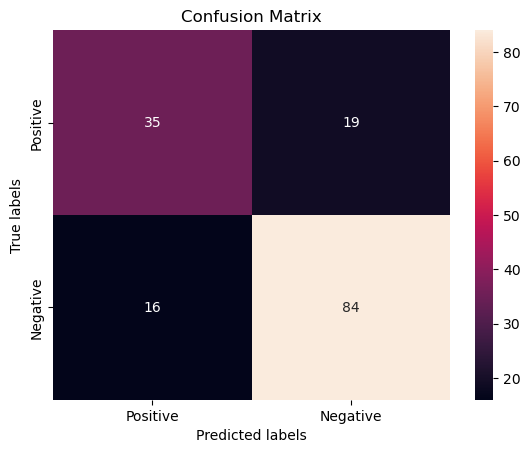

In [17]:
overall_best_weights = dfb['Best Weights'][0]
test_acc = predict(b_X_test,b_y_test,overall_best_weights)
print("Testing accuracy:",test_acc)
accuracy_scores(b_X_test,b_y_test,overall_best_weights)

### Hyperparameter Tuning Without Bias

In [18]:
accuracy_table = list()
learning_Rates = [1,.1,.01,.001,0.0001]
epoch = np.arange(10,101,10)
loss =["perceptron","zero_one"]
for e in epoch:
    for lr_rate in learning_Rates:
        for l in loss:
            best_weights = 0
            best_accu = 0
            best_epoch = 0
            e_val_loss_list = []
            e_train_loss_list = []
            e_val_acc_list = []
            e_train_acc_list = []
            np.random.seed(84)
            weights = np.random.rand(8)
            for i in range(e):
                weights = update_weights(weights,X_train,y_train,l,lr_rate)
                train_acc = predict(X_train,y_train,weights)
                val_acc = predict(X_Val,y_Val,weights)
                e_val_acc_list.append(val_acc)
                e_train_acc_list.append(train_acc)
                if l =="zero_one":
                    e_train_loss = zero_one_loss(X_train,y_train,weights)
                    e_val_loss = zero_one_loss(X_Val,y_Val,weights)
                else:
                    e_train_loss = perceptron_loss(X_train,y_train,weights)
                    e_val_loss = perceptron_loss(X_Val,y_Val,weights)
                e_val_loss_list.append(e_val_loss)
                e_train_loss_list.append(e_train_loss)
            #     print("Iteration ",i)
            #     print("Training accuracy:",train_acc," Validation accuracy:",val_acc,"Validation Loss:",val_loss,"Training Loss ",train_loss)
                if val_acc>best_accu:
                    best_epoch=(i+1)
                    best_accu = val_acc
                    best_weights = weights

            accuracy_table.append((best_accu,lr_rate,l,best_epoch,e,best_weights))
            #Plotting Loss Curve
#             plt.figure(figsize=(5, 4))
#             if l =="zero_one":
#                 plt.title("Plotting Training vs Validation Loss with Zero_One_Loss with lr = "+ str(lr_rate))
#             else:
#                 plt.title("Plotting Training vs Validation Loss with Perceptron_Loss with lr = "+ str(lr_rate))
#             plt.plot(np.arange(e), e_val_loss_list, label = "Validation Loss")
#             plt.plot(np.arange(e), e_train_loss_list, label = "Training Loss")
#             plt.legend()
#             plt.show()

#             #Plotting Validation Curve
#             plt.figure(figsize=(5, 4))
#             if l =="zero_one":
#                 plt.title("Plotting Training vs Validation Accuracy with Zero_One_Loss with lr = "+ str(lr_rate))
#             else:
#                 plt.title("Plotting Training vs Validation Accuracy with Perceptron_Loss with lr = "+ str(lr_rate))

#             plt.plot(np.arange(e), e_val_acc_list, label = "Validation Accuracy")
#             plt.plot(np.arange(e), e_train_acc_list, label = "Training Accuracy")
#             plt.legend()
#             plt.show()
            print("best accuracy: ",best_accu)
            print("best weights: " ,best_weights)

best accuracy:  0.6504065040650406
best weights:  [ 3.27741210e+26 -2.84762806e+26 -9.82811799e+25  3.82418771e+26
  5.23084089e+26 -2.77510719e+25  4.28241572e+26  3.47798642e+26]
best accuracy:  0.7479674796747967
best weights:  [-125.65987151 -203.81566755   26.35706107  -95.40189689  -87.56312384
 -109.80235415 -104.03392854 -106.04171244]
best accuracy:  0.6504065040650406
best weights:  [ 2.65650127e+16 -2.37175329e+16 -8.06840269e+15  3.11264729e+16
  4.26295645e+16 -2.49113492e+15  3.48665839e+16  2.81706837e+16]
best accuracy:  0.7642276422764228
best weights:  [ -5.81866656 -21.16493135   1.56198973  -2.68364854  -0.16994127
  -9.4808885   -3.42829024  -3.39502113]
best accuracy:  0.6504065040650406
best weights:  [ 213461.9994462  -287715.50139866  -79364.89479691  269288.2905594
  377640.02531329  -57340.75070308  303255.00665848  223731.53612748]
best accuracy:  0.7398373983739838
best weights:  [-1.30984168 -2.51804889  0.17887547 -0.59384418 -0.2892521  -1.28623763
 -0.9

best accuracy:  0.7804878048780488
best weights:  [ -95.07170551 -287.95632858   84.63579967  -55.40196149   32.37756616
 -165.39108708  -80.09201702  -34.97508924]
best accuracy:  0.6504065040650406
best weights:  [ 7.91381289e+100 -7.06553840e+100 -2.40360620e+100  9.27268830e+100
  1.26995007e+101 -7.42118058e+099  1.03868808e+101  8.39214805e+100]
best accuracy:  0.7886178861788617
best weights:  [ -8.43043901 -29.30462621   7.00133905  -3.96244403   5.45982536
 -16.70146198  -6.34665181  -2.93502662]
best accuracy:  0.6504065040650406
best weights:  [ 2.38847164e+34 -3.21931096e+34 -8.88030440e+33  3.01312396e+34
  4.22549460e+34 -6.41598133e+33  3.39318531e+34  2.50337988e+34]
best accuracy:  0.7723577235772358
best weights:  [-0.88513662 -3.22588782  0.87067922 -0.46434977  0.61762528 -1.76301918
 -0.67051004 -0.30968679]
best accuracy:  0.7398373983739838
best weights:  [-0.03480264 -0.04003671  0.0939277  -0.00735617  0.14248867 -0.08869007
 -0.12134494 -0.02494849]
best accur

In [19]:
import pandas as pd
accuracy_table.sort(reverse=True)
df = pd.DataFrame(accuracy_table, columns=["Val_Accuracy", "Learning Rate","Loss","nth Epoch","Epoch Range","Best Weights"])
df

,Val_Accuracy,Learning Rate,Loss,nth Epoch,Epoch Range,Best Weights
0,0.796748,0.0010,zero_one,24,100,"[-0.05242974486851241, -0.2961896801944002, 0...."
1,0.796748,0.0010,zero_one,24,90,"[-0.14925328036851254, -0.23670225658440022, 0..."
2,0.796748,0.0010,zero_one,24,80,"[-0.17001797686851272, -0.2116520169644002, 0...."
3,0.796748,0.0010,zero_one,24,70,"[-0.1546650178685129, -0.2471344354444003, 0.1..."
4,0.796748,0.0010,zero_one,24,60,"[-0.07995910486851306, -0.3074661009644003, 0...."
...,...,...,...,...,...,...
95,0.479675,0.0001,zero_one,20,20,"[-0.2744531867685141, 0.37835085688959924, 0.3..."
96,0.479675,0.0001,perceptron,30,30,"[-0.25348978923140203, 0.3631431157104548, 0.2..."
97,0.341463,0.0001,perceptron,20,20,"[-0.23006416383874562, 0.3772501227374562, 0.2..."
98,0.333333,0.0001,zero_one,1,10,"[-0.13851198281851426, 0.3913709569255992, 0.2..."


Testing accuracy: 0.564935064935065
F1 Score : 0.5109489051094891
Precision : 0.9459459459459459
Recall : 0.35
Confusion Matrix :


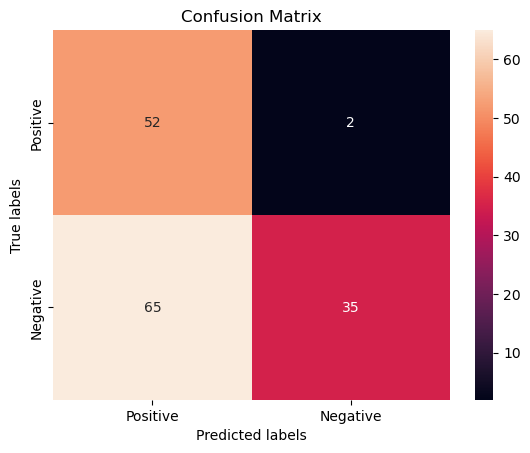

In [20]:
overall_best_weights = df['Best Weights'][0]
test_acc = predict(X_test,y_test,overall_best_weights)
print("Testing accuracy:",test_acc)
accuracy_scores(X_test,y_test,overall_best_weights)